# Projet ARF - inpainting

In [1]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

Préambule

In [2]:
def load_usps(fn):
    with open(fn,"r") as f:
        f.readline()
        data = [[float(x) for x in l.split()] for l in f if len(l.split())>2]
    tmp=np.array(data)
    return tmp[:,1:],tmp[:,0].astype(int)

def show_usps(data):
    plt.imshow(data.reshape((16,16)),interpolation="nearest",cmap="gray")

In [3]:
X_train, y_train = load_usps("USPS_train.txt")
X_test, y_test = load_usps("USPS_test.txt")

In [4]:
lr = LinearRegression()
lr.fit(X_train,y_train)
ri = Ridge()
ri.fit(X_train,y_train)
la = Lasso()
la.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [5]:
print("Comparison of accuracies")
cv=4
print("Linear Regression : ",100*sum(cross_val_score(lr,X_train,y_train,cv=cv))/cv,"%","et nb coeffs non nuls : ",len(np.where(lr.coef_!=0)[0]))
print("Ridge Regression : ",100*sum(cross_val_score(ri,X_train,y_train,cv=cv))/cv,"%","et nb coeffs non nuls : ",len(np.where(ri.coef_!=0)[0]))
print("Lasso Regression : ",100*sum(cross_val_score(la,X_train,y_train,cv=cv))/cv,"%","et nb coeffs non nuls : ",len(np.where(la.coef_!=0)[0]))

Comparison of accuracies
Linear Regression :  61.31002962482734 % et nb coeffs non nuls :  256
Ridge Regression :  61.347665819273836 % et nb coeffs non nuls :  256
Lasso Regression :  8.452891986755844 % et nb coeffs non nuls :  3


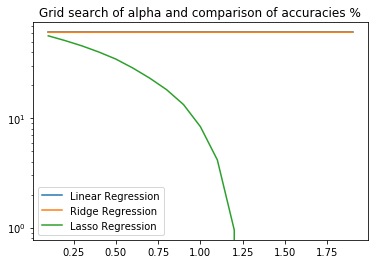

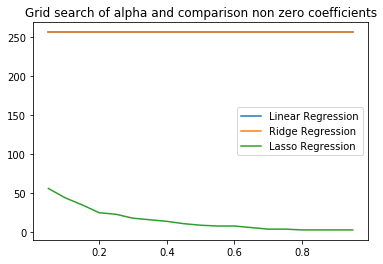

In [6]:
x = []
cv=3
y_lr = []
y_ri = []
y_la = []
for i in range(1,20):
    xx = i/10
    lr = LinearRegression()
    ri = Ridge(alpha=xx)
    la = Lasso(alpha=xx)
    x.append(xx)
    y_lr.append(100*sum(cross_val_score(lr,X_train,y_train,cv=cv))/cv)
    y_ri.append(100*sum(cross_val_score(ri,X_train,y_train,cv=cv))/cv)
    y_la.append(100*sum(cross_val_score(la,X_train,y_train,cv=cv))/cv)
plt.plot(x,y_lr,label="Linear Regression")
plt.plot(x,y_ri,label="Ridge Regression")
plt.plot(x,y_la,label="Lasso Regression")
plt.title("Grid search of alpha and comparison of accuracies %")
plt.yscale('log')
plt.legend()
x = []
plt.figure()
y_lr = []
y_ri = []
y_la = []
for i in range(1,20):
    xx = i/20
    lr = LinearRegression()
    ri = Ridge(alpha=xx)
    la = Lasso(alpha=xx)
    x.append(xx)
    lr.fit(X_train,y_train)
    ri.fit(X_train,y_train)
    la.fit(X_train,y_train)
    y_lr.append(len(np.where(lr.coef_!=0)[0]))
    y_ri.append(len(np.where(ri.coef_!=0)[0]))
    y_la.append(len(np.where(la.coef_!=0)[0]))
plt.plot(x,y_lr,label="Linear Regression")
plt.plot(x,y_ri,label="Ridge Regression")
plt.plot(x,y_la,label="Lasso Regression")
plt.title("Grid search of alpha and comparison non zero coefficients")
plt.legend()

On peut remarquer que la régression Linéaire et Ridge donnent les mêmes résultats ici, mais que la regression Lasso donne un score un peu plus faible  au début, et en augmentant alpha chute très vite, mais par contre on voit que la regression Lasso utilise dès le début très peu de coefficients non nuls, comparé  aux autres régressions, environ 80% de moins. L'utilité est d'avoir un vecteur plus sparse, n'avoir à calculer que les colonnes vraiment utiles au résultat, et généraliser plus. La regression Lasso est l'adaptation du concept de parcimonie à la régression linéaire

# Partie 2

In [ ]:
from matplotlib.colors import rgb_to_hsv, hsv_to_rgb